In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 1. DATA LOADING & PREPROCESSING

In [5]:
df= pd.read_csv('historical_data.csv')
df.tail(10)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
211214,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,1834.2,2019.45,SELL,25-04-2025 15:35,15955.1,Close Long,-97.2126,0x91ee3ee2673d3bb5da6a0422374d8c02032e0085d8eb...,88803313862,False,0.201945,3.010000e+14,1.750000e+12
211215,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,2763.7,3042.83,SELL,25-04-2025 15:35,14120.9,Close Long,-146.4761,0xe12bbe92acbb41685b310422374d8c02032f001b8cca...,88803313862,False,0.304283,1.090000e+15,1.750000e+12
211216,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,2518.5,2772.87,SELL,25-04-2025 15:35,11357.2,Close Long,-133.4805,0xe7847dc3b4513b1a6fc30422374d8c0203300046c97c...,88803313862,False,0.277286,1.360000e+14,1.750000e+12
211217,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,1064.2,1171.68,SELL,25-04-2025 15:35,8838.7,Close Long,-56.4026,0x69083c7e09f93eaaa08a0422374d8e02026e00389c33...,88803313862,False,0.117168,1.850000e+14,1.750000e+12
211218,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,227.9,250.92,SELL,25-04-2025 15:35,7774.5,Close Long,-12.0787,0xcf2f22ba82614f04957b0422374d8e020273005c5568...,88803313862,False,0.025091,4.270000e+14,1.750000e+12
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,382.2,420.80,SELL,25-04-2025 15:35,7546.6,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,2124.1,2338.63,SELL,25-04-2025 15:35,7164.4,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,423.4,466.16,SELL,25-04-2025 15:35,5040.3,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,3599.8,3963.38,SELL,25-04-2025 15:35,4616.9,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12
211223,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,1017.1,1119.83,SELL,25-04-2025 15:35,1017.1,Close Long,-53.9063,0xac77fab973c455d77a670422374d9602039800f1f78c...,88803313862,False,0.111982,3.270000e+14,1.750000e+12


In [27]:
df.isnull().sum()*1

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

In [6]:
df.describe()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12


In [32]:
df.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [33]:
df.values

array([['0xae5eacaf9c6b9111fd53034a602c192a04e082ed', '@107', 7.9769,
        ..., 0.34540448, 895000000000000.0, 1730000000000.0],
       ['0xae5eacaf9c6b9111fd53034a602c192a04e082ed', '@107', 7.98, ...,
        0.0056, 443000000000000.0, 1730000000000.0],
       ['0xae5eacaf9c6b9111fd53034a602c192a04e082ed', '@107', 7.9855,
        ..., 0.0504314, 660000000000000.0, 1730000000000.0],
       ...,
       ['0x72743ae2822edd658c0c50608fd7c5c501b2afbd', 'FARTCOIN', 1.101,
        ..., 0.046616, 693000000000000.0, 1750000000000.0],
       ['0x72743ae2822edd658c0c50608fd7c5c501b2afbd', 'FARTCOIN', 1.101,
        ..., 0.396337, 418000000000000.0, 1750000000000.0],
       ['0x72743ae2822edd658c0c50608fd7c5c501b2afbd', 'FARTCOIN', 1.101,
        ..., 0.111982, 327000000000000.0, 1750000000000.0]], dtype=object)

# 3. VISUALIZATION

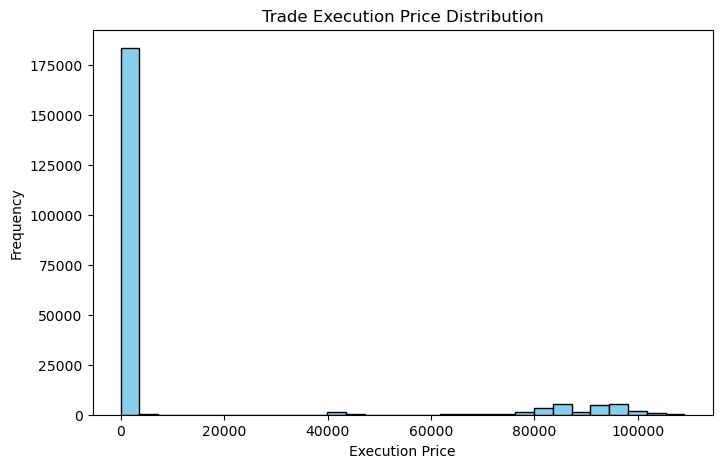

In [3]:

# Execution price varchi histogram:
plt.figure(figsize=(8,5))
plt.hist(df['Execution Price'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Execution Price')
plt.ylabel('Frequency')
plt.title('Trade Execution Price Distribution')
plt.show()









In [ ]:
sns.pairplot(df)
plt.title('All Plots')
plt.show()

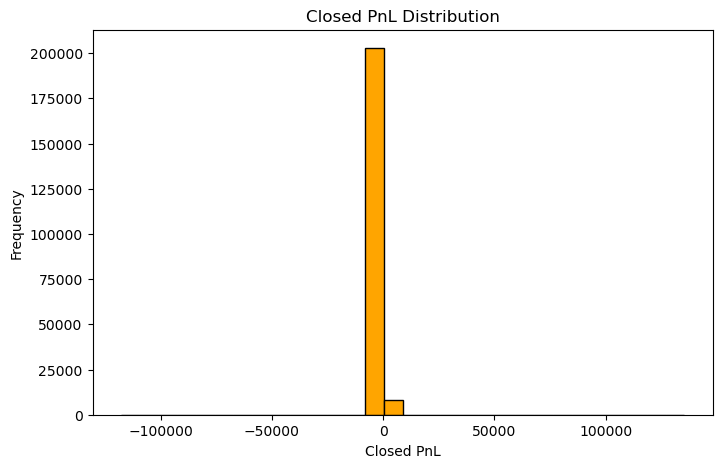

In [4]:
# Closed PnL chi distribution (histogram):
plt.figure(figsize=(8,5))
plt.hist(df['Closed PnL'], bins=30, color='orange', edgecolor='black')
plt.xlabel('Closed PnL')
plt.ylabel('Frequency')
plt.title('Closed PnL Distribution')
plt.show()

In [ ]:
# Symbol pratyek trade chi count (barplot):
plt.figure(figsize=(10,5))
df['Order ID'].value_counts().plot.bar(color='purple')
plt.xlabel('Symbol')
plt.ylabel('Number of Trades')
plt.title('Trades per Symbol')
plt.show()

In [ ]:
# Side(by buy/sell) cha pie chart:
plt.figure(figsize=(6,6))
df['Side'].value_counts().plot.pie(autopct='%1.1f%%', colors=['green','red'])
plt.title('Trade Sides (Buy/Sell)')
plt.ylabel('')
plt.show()

In [ ]:
# 6. Time series: Execution price over time (Sample)
plt.figure(figsize=(14,6))
plt.plot(pd.to_datetime(df['Timestamp IST']), df['Execution Price'], marker='o', linestyle='.')
plt.xlabel('Time')
plt.ylabel('Execution Price')
plt.title('Execution Price over Time')
plt.show()

In [24]:

# Total trades count
total_trades = len(df)
print(f"Total trades: {total_trades}")


Total trades: 211224


In [9]:
# Unique accounts
unique_accounts = df['Account'].nunique()
print(f"Unique accounts: {unique_accounts}")

Unique accounts: 32


In [18]:

# Unique symbols
unique_symbols = df['Size USD'].nunique()
print(f"Unique symbols traded USD: {unique_symbols}")

Unique symbols traded USD: 118493


In [14]:
# Average execution price (overall)
avg_execution_price = df['Execution Price'].mean()
print(f"Average execution price: {avg_execution_price:.2f}")

Average execution price: 11414.72


In [16]:

# Average trade size
avg_trade_size = df['Size Tokens'].mean()
print(f"Average trade size: {avg_trade_size:.2f}")

Average trade size: 4623.36


In [20]:
# Buy vs Sell trades count
buy_trades = df[df['Side'] == 'buy'].shape[0]
sell_trades = df[df['Side'] == 'sell'].shape[0]
print(f"Buy trades: {buy_trades}")
print(f"Sell trades: {sell_trades}")

Buy trades: 0
Sell trades: 0


In [22]:
# Average closed PnL
avg_closed_pnl = df['Closed PnL'].mean()
print(f"Average closed PnL: {avg_closed_pnl:.2f}")

Average closed PnL: 48.75


In [21]:
# Total closed PnL
total_closed_pnl = df['Closed PnL'].sum()
print(f"Total closed PnL: {total_closed_pnl:.2f}")

Total closed PnL: 10296958.94


In [23]:
# Max and Min closed PnL
max_closed_pnl = df['Closed PnL'].max()
min_closed_pnl = df['Closed PnL'].min()
print(f"Max closed PnL: {max_closed_pnl:.2f}")
print(f"Min closed PnL: {min_closed_pnl:.2f}")

Max closed PnL: 135329.09
Min closed PnL: -117990.10


In [25]:
# Average leverage used
avg_leverage = df['Fee'].mean()
print(f"Average FEE: {avg_leverage:.2f}")

Average FEE: 1.16


In [26]:
# Maximum leverage used
max_leverage = df['Fee'].max()
print(f"Maximum FEE: {max_leverage:.2f}")

Maximum FEE: 837.47


In [31]:
# Average closed PnL per symbol
avg_pnl_per_symbol = df.groupby('Start Position')['Closed PnL'].mean()
print("\nAverage closed PnL per symbol in start position:")
print(avg_pnl_per_symbol)


Average closed PnL per symbol in start position:
Start Position
-14334629.0     8.136125
-14269540.0    23.379000
-14082508.0    20.985829
-13971298.0   -23.384873
-13943529.0    20.985829
                 ...    
 14687044.0     0.000000
 19432268.0     0.000000
 23705396.0     0.000000
 23737865.0     0.000000
 30509482.0     0.000000
Name: Closed PnL, Length: 196923, dtype: float64


In [28]:
# Number of trades per symbol
trades_per_symbol = df['Closed PnL'].value_counts()
print("\nNumber of trades per symbol:")
print(trades_per_symbol)


Number of trades per symbol:
Closed PnL
 0.000000      106816
 0.146908          80
-1.566400          71
 9.903600          67
 88.459120         62
                ...  
 139.612500         1
 154.735326         1
 19.004300          1
 231.572985         1
-53.906300          1
Name: count, Length: 90720, dtype: int64


In [ ]:
print("\n" + "="*60)
print("ANALYSIS COMPLETE! All visualizations display is complete.")
print("="*60)